In [ ]:
pip install EoN


     |████████████████████████████████| 113 kB 6.7 MB/s 
  Created wheel for EoN: filename=EoN-1.1-py3-none-any.whl size=120819 sha256=4caaac1a137dd49bc1fba244185d1c51fbb16d296493bd9e4a26ae5b414235ac
  Stored in directory: /root/.cache/pip/wheels/0b/c0/a4/d6001fd809cb84c027ada5c2ab3b6d1cb2e97fec3f9978eae7
Successfully built EoN


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import EoN
import csv

#**Task-2**

In [ ]:
G = nx.Graph()
df = pd.read_csv('routes.csv')
Graph = nx.from_pandas_edgelist(df, source='Source', target='Target', create_using=G)
# nx.draw_networkx(Graph)

SIR model with gamma similar to tau

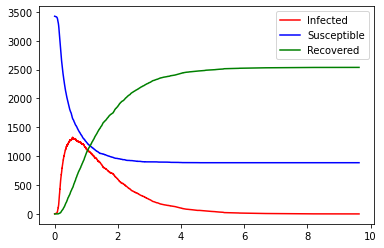

In [ ]:
tmax = 20
iterations = 99    # running total 100 iterations
tau = 1           #transmission rate
gamma = 1   #recovery rate

# print("With gamma similar to tau")
# print("gamma = 1")
# print("tau =1")
t, S, I, R = EoN.fast_SIR(Graph, tau, gamma,initial_infecteds = 'WUH', tmax = tmax)
plt.plot(t,I,color = 'r',alpha=1, label='Infected')
plt.plot(t,S,color ='b',alpha =1, label='Susceptible')
plt.plot(t,R,color ='g',alpha =1, label='Recovered')
plt.legend()


# for counter in range(iterations): #run simulations
#     t, S, I, R = EoN.fast_SIR(Graph, tau, gamma,initial_infecteds = 'WUH', tmax = tmax)
#     plt.plot(t,I,color = 'r',alpha=0.5, )
#     plt.plot(t,S,color ='b',alpha =0.5, )
#     plt.plot(t,R,color ='g',alpha =0.5, )
#     # print(t.shape)

With gamma much greater to tau

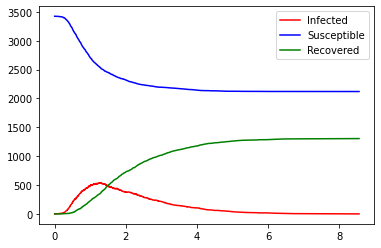

In [ ]:
tmax = 20
iterations = 99 # running total 100 iterations
tau = 0.2           #transmission rate
gamma = 1   #recovery rate

t, S, I, R = EoN.fast_SIR(Graph, tau, gamma,initial_infecteds = 'WUH', tmax = tmax)
plt.plot(t,I,color = 'r',alpha=1, label='Infected')
plt.plot(t,S,color ='b',alpha =1, label='Susceptible')
plt.plot(t,R,color ='g',alpha =1, label='Recovered')
plt.legend()

# for counter in range(iterations): #run simulations
#     t, S, I, R = EoN.fast_SIR(Graph, tau, gamma,initial_infecteds = 'WUH', tmax = tmax)
#     plt.plot(t,I,color = 'r',alpha=0.5, )
#     plt.plot(t,S,color ='b',alpha =0.5, )
#     plt.plot(t,R,color ='g',alpha =0.5, )
#     # print(t.shape)

Gamma much smaller than tau

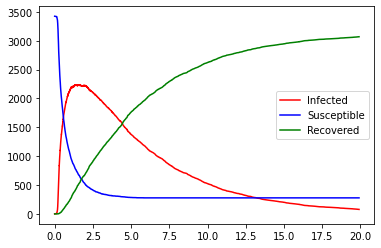

In [ ]:
tmax = 20
iterations = 99   # running total 100 iterations
tau = 1           #transmission rate
gamma = 0.2    #recovery rate

t, S, I, R = EoN.fast_SIR(Graph, tau, gamma,initial_infecteds = 'WUH', tmax = tmax) # first simulation
plt.plot(t,I,color = 'r',alpha=1.0, label='Infected')
plt.plot(t,S,color ='b',alpha =1.0, label='Susceptible')
plt.plot(t,R,color ='g',alpha =1.0, label='Recovered')
plt.legend()

# for counter in range(iterations): #run 99 simulations
#     t, S, I, R = EoN.fast_SIR(Graph, tau, gamma,initial_infecteds = 'WUH', tmax = tmax)
#     plt.plot(t,I,color = 'r',alpha=0.5, )
#     plt.plot(t,S,color ='b',alpha =0.5, )
#     plt.plot(t,R,color ='g',alpha =0.5, )
#     # print(t.shape)

#***Task-3***



>  Defining a function which runs an SIR model with tau = 1 and gamma =0, which returns 

1.   A list which contains 100 dictionaries one for each iteration and each dictionary has every node as key and time taken to get infected as value 
2.  A set of disconnected nodes to keep track of the nodes disconnected from the network
3.  full data of the last simulation








In [ ]:
def run_100_iterations(Grph):
  iterations = 100
  tau = 1          #transmission rate
  gamma = 0    #recovery rate

  Time_List_100 = []
  Disconnected_nodes =[]
  Disconnected_nodes_100 = set()
  count =0
  average=0
  
  for counter in range(iterations): #run simulations
    full_data = EoN.fast_SIR(Grph, tau, gamma,initial_infecteds = 'WUH', return_full_data=True)
    total=0
    dic_Ti_graph = {}
    for node in Graph.nodes():
      timelist, statuslist = full_data.node_history(node)
      if len(timelist) == 2:           # taking the second value from the tuple as the first one is zero when the status was 
        dic_Ti_graph[node]=timelist[1] # susceptible and second value is the time when node became infected
      else:
        dic_Ti_graph[node] = 6          # Giving the value as zero if the node did not change status and putting those nodes in a list
        Disconnected_nodes.append(node)
    Time_List_100.append(dic_Ti_graph)
    for nod in Disconnected_nodes:      
      Disconnected_nodes_100.add(nod)   # appending all the disconnected nodes
  return(Time_List_100,Disconnected_nodes_100,full_data)

Defining a function which calls the above function and calculates the value Ti(average time taken by node i to get infected over 100 iterations) for every node and returns a dictionary of Ti's with nodes as keys. Disconnected nodes and full data are returned as it is.

In [ ]:
def calculate_Ti(Grph):
  Time_List,Disconnect_nodes,full_data = run_100_iterations(Grph)
  dict_Ti_avg= {}
  
  for node in Graph.nodes():
    nodetime = 0
    for i in range(100):    
      nodetime = nodetime + Time_List[i][node]
    dict_Ti_avg[node] =nodetime/100
  return(dict_Ti_avg,Disconnect_nodes,full_data)


Calculating Ti's for our network

In [ ]:
dict_Ti_average,Disconnected_nodes,full_data = calculate_Ti(Graph)

#**Task 3.a**
Getting degree of each node in a dictionary

In [ ]:

dict_ki=dict(nx.degree(Graph))      # ki denotes degree of each node i

Creating a dataframe with columns: Nodes, Ti, ki

In [ ]:
data = []
for node in Graph.nodes():
  data.append((node,dict_Ti_average[node],dict_ki[node]))

df_ti_ki = pd.DataFrame(data, columns = ['Nodes', 'Ti', 'ki'])
df_ti_ki

,Nodes,Ti,ki
0,AER,0.204113,18
1,KZN,0.209721,21
2,ASF,0.272290,7
3,MRV,0.203348,16
4,CEK,0.210750,14
...,...,...,...
3420,WIN,0.945514,2
3421,LSY,1.275512,1
3422,MIM,0.498715,3
3423,MYA,0.822821,2


In [ ]:
df_ti_ki.to_csv('ti_ki.csv')  

#Plotting Ti vs ki

Text(0, 0.5, 'ki (Node Degree)')

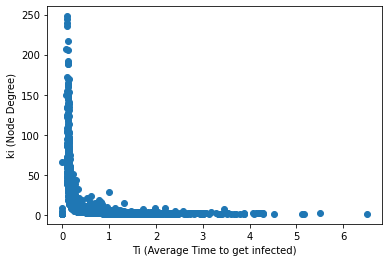

In [ ]:
plt.scatter(df_ti_ki.loc[:,'Ti'],df_ti_ki.loc[:,'ki'])
plt.xlabel('Ti (Average Time to get infected)')
plt.ylabel('ki (Node Degree)')

# TAsk 3.b
**Getting distance of each node from WUHAN**
all_pairs_shortest_path_length function returns a dictionary for shortest path to every other node from each node. We will be concerned with only key value WUH which is Wuhan

In [ ]:
spl = dict(nx.all_pairs_shortest_path_length(Graph))

In [ ]:
len(spl['WUH'])

3397

In [ ]:
dict_dist={}
Non_reachable_nodes_list = []  # creating a list for nodes which are not reachable from Wuhan
for node in Graph.nodes():
  if node in spl['WUH']:
    if node!='WUH':
      dict_dist[node] = spl['WUH'][node]
  else:
    dict_dist[node] = 100  # assigning 100 as a maximum distance to nodes which have no path to Wuhan
    Non_reachable_nodes_list.append(node) # adding the nodes which could not be reached to above list 

In [ ]:
print(len(Non_reachable_nodes_list))
len(dict_dist)


28


3424

Creating a dataframe with columns: Nodes, Ti, Dist_Wuhan

In [ ]:
data = []
for node in Graph.nodes():
  if node != 'WUH':
    if dict_dist[node]!=100:
      data.append((node,dict_Ti_average[node],dict_dist[node]))

df_ti_d = pd.DataFrame(data, columns = ['Node', 'Ti', 'Dist_Wuhan'])

In [ ]:
df_ti_d

,Node,Ti,Dist_Wuhan
0,AER,0.204113,3
1,KZN,0.209721,3
2,ASF,0.272290,3
3,MRV,0.203348,3
4,CEK,0.210750,3
...,...,...,...
3391,WIN,0.945514,4
3392,LSY,1.275512,3
3393,MIM,0.498715,3
3394,MYA,0.822821,3


# Plotting Ti vs Distance_from_Wuhan

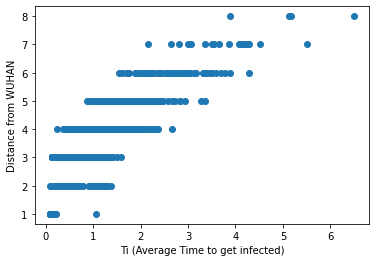

In [ ]:
plt.scatter(df_ti_d.loc[:,'Ti'],df_ti_d.loc[:,'Dist_Wuhan'])
plt.xlabel('Ti (Average Time to get infected)')
plt.ylabel('Distance from WUHAN')
plt.show()


# Task 3.c

Importing nodes data for getting information about country of each airport so that it can be plotted on the world map

In [ ]:
df_air = pd.read_csv("airports.csv")
df_air

,Nodes,Lat,Long,Country
0,GKA,-6.081690,145.391998,Papua New Guinea
1,MAG,-5.207080,145.789002,Papua New Guinea
2,HGU,-5.826790,144.296005,Papua New Guinea
3,LAE,-6.569803,146.725977,Papua New Guinea
4,POM,-9.443380,147.220001,Papua New Guinea
...,...,...,...,...
12663,\N,51.849998,107.737999,Russia
12664,\N,58.625000,31.385000,Russia
12665,CPO,-27.261200,-70.779198,Chile
12666,\N,46.880001,35.305000,Ukraine


Joining on the above dataframe with our previous dataframe to aggregate the location and country data with Ti data.

In [ ]:
df_merge = pd.merge(df_ti_ki,df_air, how = 'inner', on ="Nodes")
df_merge

,Nodes,Ti,ki,Lat,Long,Country
0,AER,0.204113,18,43.449902,39.956600,Russia
1,KZN,0.209721,21,55.606201,49.278702,Russia
2,ASF,0.272290,7,46.283298,48.006302,Russia
3,MRV,0.203348,16,44.225101,43.081902,Russia
4,CEK,0.210750,14,55.305801,61.503300,Russia
...,...,...,...,...,...,...
3371,WIN,0.945514,2,-22.363600,143.085998,Australia
3372,LSY,1.275512,1,-28.830299,153.259995,Australia
3373,MIM,0.498715,3,-36.908600,149.901001,Australia
3374,MYA,0.822821,2,-35.897800,150.143997,Australia


Grouping the rows in above dataframe by Country columns. In other words, merging the rows which have same country name in the column Country and aggregating the values of Ti by taking their avearge.

In [ ]:
# df_merge = pd.merge(df_ti_ki,df_air, how = 'inner', on ="Nodes")
# df_merge
df_country = pd.DataFrame(df_merge.groupby("Country")["Ti"].mean())
df_country


,Ti
Country,
Afghanistan,0.344554
Albania,0.187898
Algeria,0.721814
American Samoa,1.107116
Angola,0.858772
...,...
Wallis and Futuna,1.282507
Western Sahara,0.499516
Yemen,0.592525


Here, I have exported the above dataframe to a csv file and consequently plotted the data on world map colored according to the T value using Excel. The image below is pasted from Excel worksheet

In [ ]:
df_country.to_csv('country_ti.csv', index=True)

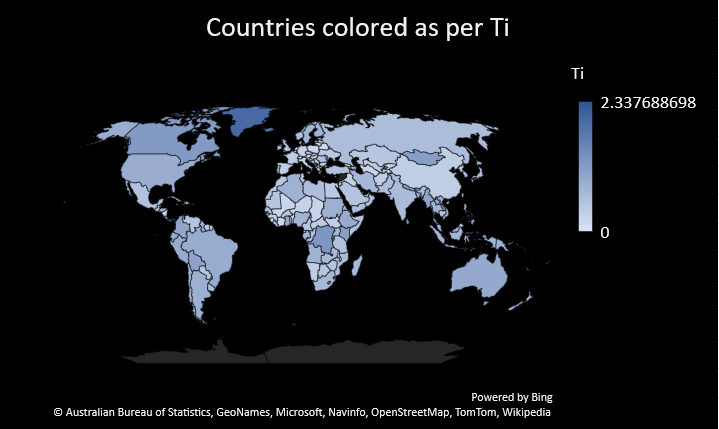

# Task 4-- Node Removal analysis

Average Ti 0.7792582133827184


Running SIR model before removing any node with zero recovery rate

T(Average Ti) =  0.7792582133827184


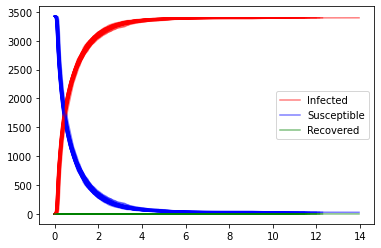

In [ ]:
# Calculating initital average Ti (T) before removing any node
T = np.mean(df_ti_ki.loc[:,'Ti'].values)
print('T(Average Ti) = ', T)
tmax = 20
iterations = 100  
tau = 1           #transmission rate
gamma = 0    #recovery rate

t, S, I, R = EoN.fast_SIR(Graph, tau, gamma,initial_infecteds = 'WUH', tmax = tmax) # first simulation
plt.plot(t,I,color = 'r',alpha=0.5, label='Infected')
plt.plot(t,S,color ='b',alpha =0.5, label='Susceptible')
plt.plot(t,R,color ='g',alpha =0.5, label='Recovered')
plt.legend()
for counter in range(iterations): # 99 more simulations
    t, S, I, R = EoN.fast_SIR(Graph, tau, gamma,initial_infecteds = 'WUH', tmax = tmax)
    plt.plot(t,I,color = 'r',alpha=0.5)
    plt.plot(t,S,color ='b',alpha =0.5)
    plt.plot(t,R,color ='g',alpha =0.5)
    # print(t.shape)

Now, for random node removal creating a list of all the node creating lists of random 5%,10%,15%,20%,25%,30% nodes.

**Note:** We will remove Wuhan from this list to make sure that Wuhan is not removed randomly beacuse in that case infections will not even start.

In [ ]:
import random
Node_List = list(Graph.nodes())
print(len(Node_List))
Node_List.remove('WUH') # Remove Wuhan from the list as we dont want Wuhan to be removed randomly
print(len(Node_List))
five = int(0.05*len(Node_List))
ten = int(0.1*len(Node_List))
fifteen = int(0.15*len(Node_List))
twenty = int(0.2*len(Node_List))
twentyfive = int(0.25*len(Node_List))
thirty = int(0.3*len(Node_List))
Rand_5 = random.sample(Node_List, five)
Rand_10 = random.sample(Node_List, ten)
Rand_15 = random.sample(Node_List, fifteen)
Rand_20 = random.sample(Node_List, twenty)
Rand_25 = random.sample(Node_List, twentyfive)
Rand_30 = random.sample(Node_List, thirty)


3425
3424


In [ ]:
print(len(Rand_5),len(Rand_10),len(Rand_15),len(Rand_20),len(Rand_25),len(Rand_30))

171 342 513 684 856 1027


Defining a custom function to calculate avearge Ti value which negates the zero values, so that our average value is not decreased exponentially because of these zero values after node removals

In [ ]:
def average(Ti):
  sum =0
  count =0
  for value in list(Ti.values()):
    if value !=0:
      sum = sum+value
      count=count+1
  return sum/count

Removing 5% random nodes, getting average Ti and running SIR model on this network

Number of nodes before removal 3425
Number of nodes after removal 3254
5% random nodes removed
Number of nodes disconnected from Wuhan 114
T(Average Ti) =  0.9553959417877798


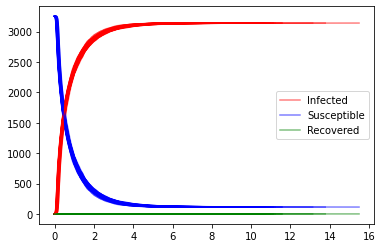

In [ ]:
# Adding nodes again
Graph = nx.from_pandas_edgelist(df, source='Source', target='Target', create_using=G)
print('Number of nodes before removal', len(Graph.nodes()))

Graph.remove_nodes_from(Rand_5)
Node_list=list(Graph.nodes())
print('Number of nodes after removal', len(Node_list))

print("5% random nodes removed")
Ti_5,Dis_5,full_data_5= calculate_Ti(Graph)
print("Number of nodes disconnected from Wuhan", len(Dis_5))
T_Rand_5 = average(Ti_5)
print('T(Average Ti) = ', T_Rand_5)

tmax = 20
iterations = 100  
tau = 1           #transmission rate
gamma = 0    #recovery rate

t, S, I, R = EoN.fast_SIR(Graph, tau, gamma,initial_infecteds = 'WUH', tmax = tmax) # first simulation
plt.plot(t,I,color = 'r',alpha=0.5, label='Infected')
plt.plot(t,S,color ='b',alpha =0.5, label='Susceptible')
plt.plot(t,R,color ='g',alpha =0.5, label='Recovered')
plt.legend()
for counter in range(iterations): # 99 more simulations
    t, S, I, R = EoN.fast_SIR(Graph, tau, gamma,initial_infecteds = 'WUH', tmax = tmax)
    plt.plot(t,I,color = 'r',alpha=0.5)
    plt.plot(t,S,color ='b',alpha =0.5)
    plt.plot(t,R,color ='g',alpha =0.5)
    # print(t.shape)

 Removing 10 % Random Nodes 
 (Firstly adding all the nodes and then removing 10% from the original network)

Number of nodes before removal 3425
Number of nodes after removal 3083
10% random nodes removed
Number of nodes disconnected from Wuhan 132
Average value of Ti after removing nodes 1.0646136934617574


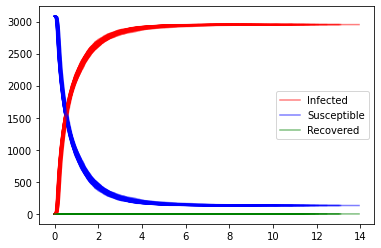

In [ ]:
# Adding nodes again
Graph = nx.from_pandas_edgelist(df, source='Source', target='Target', create_using=G)
print('Number of nodes before removal', len(Graph.nodes()))

Graph.remove_nodes_from(Rand_10)
Node_list=list(Graph.nodes())
print('Number of nodes after removal', len(Node_list))

print("10% random nodes removed")
Ti_10,Dis_10,full_data_10 = calculate_Ti(Graph)
print("Number of nodes disconnected from Wuhan", len(Dis_10))
T_Rand_10 = average(Ti_10)
print('Average value of Ti after removing nodes', T_Rand_10)

tmax = 20
iterations = 100  
tau = 1           #transmission rate
gamma = 0    #recovery rate

t, S, I, R = EoN.fast_SIR(Graph, tau, gamma,initial_infecteds = 'WUH', tmax = tmax) # first simulation
plt.plot(t,I,color = 'r',alpha=0.5, label='Infected')
plt.plot(t,S,color ='b',alpha =0.5, label='Susceptible')
plt.plot(t,R,color ='g',alpha =0.5, label='Recovered')
plt.legend()
for counter in range(iterations): # 99 more simulations
    t, S, I, R = EoN.fast_SIR(Graph, tau, gamma,initial_infecteds = 'WUH', tmax = tmax)
    plt.plot(t,I,color = 'r',alpha=0.5)
    plt.plot(t,S,color ='b',alpha =0.5)
    plt.plot(t,R,color ='g',alpha =0.5)
    # print(t.shape)


Removing 15% Random Nodes (Firstly adding all the nodes and then removing 15% from the original network)

Number of nodes before removal 3425
Number of nodes after removal 2912
15% random nodes removed
Number of disconnected nodes 195
Number of nodes disconnected from Wuhan 1.34731067789933


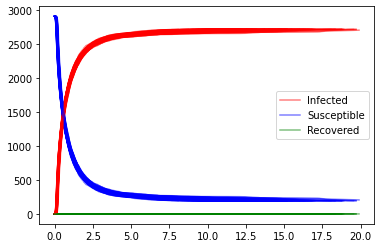

In [ ]:
# Adding nodes again
Graph = nx.from_pandas_edgelist(df, source='Source', target='Target', create_using=G)
print('Number of nodes before removal', len(Graph.nodes()))

Graph.remove_nodes_from(Rand_15)
Node_list=list(Graph.nodes())
print('Number of nodes after removal', len(Node_list))

print("15% random nodes removed")
Ti_15,Dis_15,full_data_15 = calculate_Ti(Graph)
print("Number of disconnected nodes", len(Dis_15))
T_Rand_15 = average(Ti_15)
print("Number of nodes disconnected from Wuhan", T_Rand_15)

t, S, I, R = EoN.fast_SIR(Graph, tau, gamma,initial_infecteds = 'WUH', tmax = tmax) # first simulation
plt.plot(t,I,color = 'r',alpha=0.5, label='Infected')
plt.plot(t,S,color ='b',alpha =0.5, label='Susceptible')
plt.plot(t,R,color ='g',alpha =0.5, label='Recovered')
plt.legend()
for counter in range(iterations): # 99 more simulations
    t, S, I, R = EoN.fast_SIR(Graph, tau, gamma,initial_infecteds = 'WUH', tmax = tmax)
    plt.plot(t,I,color = 'r',alpha=0.5)
    plt.plot(t,S,color ='b',alpha =0.5)
    plt.plot(t,R,color ='g',alpha =0.5)
    # print(t.shape)


Removing 20% Random Nodes (Firstly adding all the nodes and then removing 20% from the original network)

Number of nodes before removal 3425
Number of nodes after removal 2741
20% random nodes removed
Number of nodes disconnected from Wuhan 187
Average value of Ti after removing nodes 1.2706851458109807


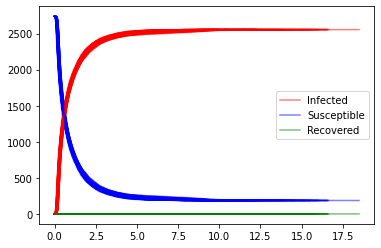

In [ ]:
# Adding nodes again
Graph = nx.from_pandas_edgelist(df, source='Source', target='Target', create_using=G)
print('Number of nodes before removal', len(Graph.nodes()))

Graph.remove_nodes_from(Rand_20)
Node_list=list(Graph.nodes())
print('Number of nodes after removal', len(Node_list))

print("20% random nodes removed")
Ti_20,Dis_20,full_data_20 = calculate_Ti(Graph)
print("Number of nodes disconnected from Wuhan", len(Dis_20))
T_Rand_20 = average(Ti_20)
print('Average value of Ti after removing nodes', T_Rand_20)

t, S, I, R = EoN.fast_SIR(Graph, tau, gamma,initial_infecteds = 'WUH', tmax = tmax) # first simulation
plt.plot(t,I,color = 'r',alpha=0.5, label='Infected')
plt.plot(t,S,color ='b',alpha =0.5, label='Susceptible')
plt.plot(t,R,color ='g',alpha =0.5, label='Recovered')
plt.legend()
for counter in range(iterations): # 99 more simulations
    t, S, I, R = EoN.fast_SIR(Graph, tau, gamma,initial_infecteds = 'WUH', tmax = tmax)
    plt.plot(t,I,color = 'r',alpha=0.5)
    plt.plot(t,S,color ='b',alpha =0.5)
    plt.plot(t,R,color ='g',alpha =0.5)
    # print(t.shape)


Removing 25% Random Nodes (Firstly adding all the nodes and then removing 25% from the original network)

Number of nodes before removal 3425
Number of nodes after removal 2569
25% random nodes removed
Number of nodes disconnected from Wuhan 292
Average value of Ti after removing nodes 1.4656118514130665


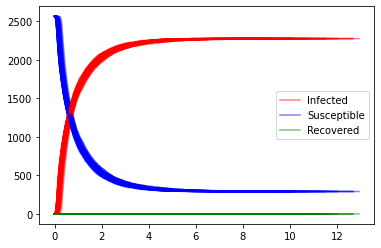

In [ ]:
# Adding nodes again
Graph = nx.from_pandas_edgelist(df, source='Source', target='Target', create_using=G)
print('Number of nodes before removal', len(Graph.nodes()))

Graph.remove_nodes_from(Rand_25)
Node_list=list(Graph.nodes())
print('Number of nodes after removal', len(Node_list))

print("25% random nodes removed")
Ti_25,Dis_25,full_data_25 = calculate_Ti(Graph)
print("Number of nodes disconnected from Wuhan", len(Dis_25))
T_Rand_25 = average(Ti_25)
print('Average value of Ti after removing nodes', T_Rand_25)

t, S, I, R = EoN.fast_SIR(Graph, tau, gamma,initial_infecteds = 'WUH', tmax = tmax) # first simulation
plt.plot(t,I,color = 'r',alpha=0.5, label='Infected')
plt.plot(t,S,color ='b',alpha =0.5, label='Susceptible')
plt.plot(t,R,color ='g',alpha =0.5, label='Recovered')
plt.legend()
for counter in range(iterations): # 99 more simulations
    t, S, I, R = EoN.fast_SIR(Graph, tau, gamma,initial_infecteds = 'WUH', tmax = tmax)
    plt.plot(t,I,color = 'r',alpha=0.5)
    plt.plot(t,S,color ='b',alpha =0.5)
    plt.plot(t,R,color ='g',alpha =0.5)
    # print(t.shape)


Removing 30% Random nodes(Firstly adding all the nodes and then removing 30% from the original network)

Number of nodes before removal 3425
Number of nodes after removal 2398
30% random nodes removed
Number of nodes disconnected from Wuhan 455
Average value of Ti after removing nodes 1.796857276659697


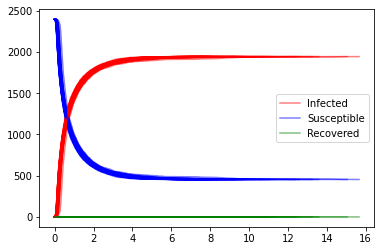

In [ ]:
# Adding nodes again
Graph = nx.from_pandas_edgelist(df, source='Source', target='Target', create_using=G)
print('Number of nodes before removal', len(Graph.nodes()))

Graph.remove_nodes_from(Rand_30)
Node_list=list(Graph.nodes())
print('Number of nodes after removal', len(Node_list))

print("30% random nodes removed")
Ti_30,Dis_30,full_data_30 = calculate_Ti(Graph)
print("Number of nodes disconnected from Wuhan", len(Dis_30))
T_Rand_30 = average(Ti_30)
print('Average value of Ti after removing nodes', T_Rand_30)

t, S, I, R = EoN.fast_SIR(Graph, tau, gamma,initial_infecteds = 'WUH', tmax = tmax) # first simulation
plt.plot(t,I,color = 'r',alpha=0.5, label='Infected')
plt.plot(t,S,color ='b',alpha =0.5, label='Susceptible')
plt.plot(t,R,color ='g',alpha =0.5, label='Recovered')
plt.legend()
for counter in range(iterations): # 99 more simulations
    t, S, I, R = EoN.fast_SIR(Graph, tau, gamma,initial_infecteds = 'WUH', tmax = tmax)
    plt.plot(t,I,color = 'r',alpha=0.5)
    plt.plot(t,S,color ='b',alpha =0.5)
    plt.plot(t,R,color ='g',alpha =0.5)
    # print(t.shape)

# Removing nodes as per Eigen Vector Centrality

In [ ]:
# Adding nodes again
Graph = nx.from_pandas_edgelist(df, source='Source', target='Target', create_using=G)
print('Number of nodes before removal', len(Graph.nodes()))

# Creating a dictionary of eigenvector centralities of all nodes
e_c = nx.eigenvector_centrality(Graph)
len(e_c)


Number of nodes before removal 3425


3425

In [ ]:
# Sorting it in Descending order of eigenvector centrality values
sorted_e_c = sorted(e_c.items(), key = lambda x:x[1], reverse = True)
len(sorted_e_c)

3425

Creating a function which removes x% most eigen vector nodes and maked sure Wuhan is node removed, calculates average Ti and runs SIR model on the resulting network

In [ ]:
# Removing x% most eigonvector central nodes and caculating TI and average
def remove_x_percent_nodes_calculate_Ti_average(x):
  # Adding nodes again
  Graph = nx.from_pandas_edgelist(df, source='Source', target='Target', create_using=G)
  print("length of Graph before removing nodes:",len(Graph.nodes()))
  node_list=[]
  Ti=[]
  sliced_list = sorted_e_c[0 : int((x/100)*len(sorted_e_c))]
  for list in sliced_list:  # Wuhan Should not be removed
    if list[0] != 'WUH':
      node_list.append(list[0])
  Graph.remove_nodes_from(node_list)
  print("length of Graph after removing nodes:",len(Graph.nodes()))
  Ti,Dis,full_data = calculate_Ti(Graph)
  print("Number of disconnected nodes", len(Dis))
  T_avg = average(Ti)
  print('Average value of Ti after removing nodes', T_avg)


  t, S, I, R = EoN.fast_SIR(Graph, tau, gamma,initial_infecteds = 'WUH', tmax = tmax) # first simulation
  plt.plot(t,I,color = 'r',alpha=0.5, label='Infected')
  plt.plot(t,S,color ='b',alpha =0.5, label='Susceptible')
  plt.plot(t,R,color ='g',alpha =0.5, label='Recovered')
  plt.legend()
  for counter in range(iterations): # 99 more simulations
    t, S, I, R = EoN.fast_SIR(Graph, tau, gamma,initial_infecteds = 'WUH', tmax = tmax)
    plt.plot(t,I,color = 'r',alpha=0.5)
    plt.plot(t,S,color ='b',alpha =0.5)
    plt.plot(t,R,color ='g',alpha =0.5)
    # print(t.shape)
  



Removing 5% most eigen vector nodes

length of Graph before removing nodes: 3425
length of Graph after removing nodes: 3254
Number of disconnected nodes 550
Average value of Ti after removing nodes 2.2243419803919866


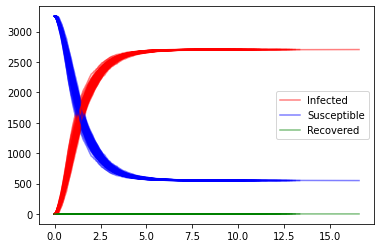

In [ ]:
T_Eigen_5 = remove_x_percent_nodes_calculate_Ti_average(5)

Removing 10 % most eigen vector nodes

length of Graph before removing nodes: 3425
length of Graph after removing nodes: 3084
Number of disconnected nodes 1308
Average value of Ti after removing nodes 5.030583027614325


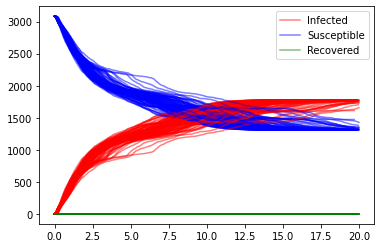

In [ ]:
T_Eigen_10 = remove_x_percent_nodes_calculate_Ti_average(10)

Removing 15% most eigen vector nodes

length of Graph before removing nodes: 3425
length of Graph after removing nodes: 2913
Number of disconnected nodes 2238
Average value of Ti after removing nodes 5.431837141128431


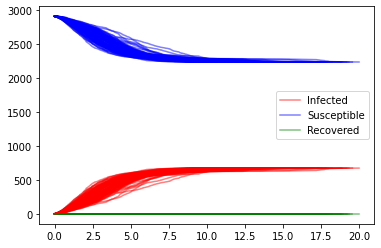

In [ ]:
T_Eigen_15 = remove_x_percent_nodes_calculate_Ti_average(15)

Removing 20% most eigen vector nodes

length of Graph before removing nodes: 3425
length of Graph after removing nodes: 2741
Number of disconnected nodes 2656
Average value of Ti after removing nodes 5.885416940696176


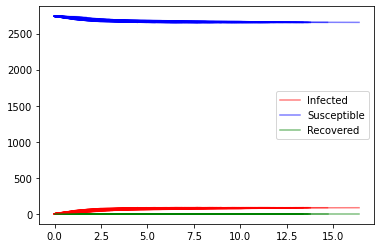

In [ ]:
T_Eigen_20 = remove_x_percent_nodes_calculate_Ti_average(20)

Removing 25% most eigen vector nodes

length of Graph before removing nodes: 3425
length of Graph after removing nodes: 2570
Number of disconnected nodes 2553
Average value of Ti after removing nodes 5.973660023529263


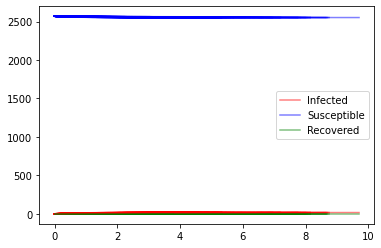

In [ ]:
T_Eigen_25 = remove_x_percent_nodes_calculate_Ti_average(25)

Removing 30% most eigen vector nodes

length of Graph before removing nodes: 3425
length of Graph after removing nodes: 2399
Number of disconnected nodes 2398
Average value of Ti after removing nodes 5.997920850022732


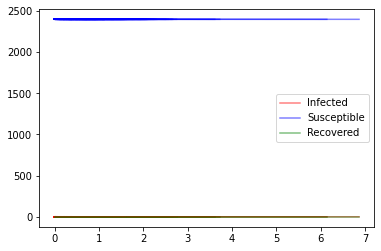

In [ ]:
T_Eigen_30 = remove_x_percent_nodes_calculate_Ti_average(30)

In [ ]:
df_Bridging = pd.read_csv('Bridging.csv')
df_Bridging

,Id,Bridging Centrality
0,DAV,182082.90720
1,JQA,68753.12500
2,JAV,22765.69191
3,CHU,18050.89286
4,BOC,17332.33607
...,...,...
3420,GFN,0.00000
3421,RCM,0.00000
3422,LSY,0.00000
3423,MYA,0.00000


In [ ]:
nodes_b = list(df_Bridging['Id'])
nodes_b.remove('WUH')
nodes_b_5=nodes_b[0:171]
nodes_b_10=nodes_b[0:342]
nodes_b_15=nodes_b[0:513]
nodes_b_20=nodes_b[0:684]
nodes_b_25=nodes_b[0:856]
nodes_b_30=nodes_b[0:1027]

Number of nodes before removal 3425
Number of nodes after removal 3254
Number of disconnected nodes 145
Average value of Ti after removing nodes 0.9216732639487206


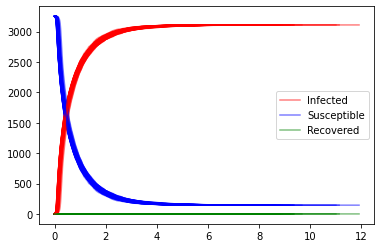

In [ ]:
Graph = nx.from_pandas_edgelist(df, source='Source', target='Target', create_using=G)
print('Number of nodes before removal', len(Graph.nodes()))
Graph.remove_nodes_from(nodes_b_5)
Node_list=list(Graph.nodes())
print('Number of nodes after removal', len(Node_list))
Ti_5,Dis_5,full_data_5= calculate_Ti(Graph)
print("Number of disconnected nodes", len(Dis_5))
T_b_5 = average(Ti_5)
print('Average value of Ti after removing nodes', T_b_5)

tmax = 20
iterations = 100  
tau = 1           #transmission rate
gamma = 0    #recovery rate

t, S, I, R = EoN.fast_SIR(Graph, tau, gamma,initial_infecteds = 'WUH', tmax = tmax) # first simulation
plt.plot(t,I,color = 'r',alpha=0.5, label='Infected')
plt.plot(t,S,color ='b',alpha =0.5, label='Susceptible')
plt.plot(t,R,color ='g',alpha =0.5, label='Recovered')
plt.legend()
for counter in range(iterations): # 99 more simulations
    t, S, I, R = EoN.fast_SIR(Graph, tau, gamma,initial_infecteds = 'WUH', tmax = tmax)
    plt.plot(t,I,color = 'r',alpha=0.5)
    plt.plot(t,S,color ='b',alpha =0.5)
    plt.plot(t,R,color ='g',alpha =0.5)



In [ ]:
df_dis_5 = pd.DataFrame(Dis_5, columns=['Nodes'])
df_dis_5
df_merge = pd.merge(df_dis_5,df_air, how = 'inner', on ="Nodes")
df_merge
df_country = pd.DataFrame(df_merge.groupby("Country"))
df_country

,0,1
0,Australia,Nodes Lat Long Country 1 ...
1,Brazil,Nodes Lat Long Country 27 ...
2,Burma,Nodes Lat Long Country 74 KAW ...
3,Canada,Nodes Lat Long Country 0 ...
4,China,Nodes Lat Long Country 35 WUH 3...
5,Cocos (Keeling) Islands,Nodes Lat Long Co...
6,Congo (Kinshasa),Nodes Lat Long Country...
7,Greenland,Nodes Lat Long Country 10 ...
8,Iceland,Nodes Lat Long Country 22 R...
9,Israel,Nodes Lat Long Country 21 HF...


Number of nodes before removal 3425
Number of nodes after removal 3083
Number of disconnected nodes 299
Average value of Ti after removing nodes 1.163091057918879


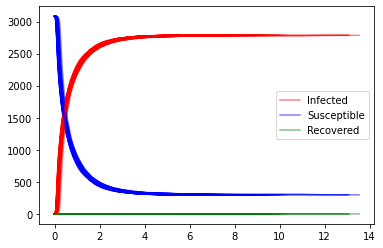

In [ ]:
Graph = nx.from_pandas_edgelist(df, source='Source', target='Target', create_using=G)
print('Number of nodes before removal', len(Graph.nodes()))

Graph.remove_nodes_from(nodes_b_10)
Node_list=list(Graph.nodes())
print('Number of nodes after removal', len(Node_list))
Ti_5,Dis_5,full_data_5= calculate_Ti(Graph)
print("Number of disconnected nodes", len(Dis_5))
T_b_5 = average(Ti_5)
print('Average value of Ti after removing nodes', T_b_5)

tmax = 20
iterations = 100  
tau = 1           #transmission rate
gamma = 0    #recovery rate

t, S, I, R = EoN.fast_SIR(Graph, tau, gamma,initial_infecteds = 'WUH', tmax = tmax) # first simulation
plt.plot(t,I,color = 'r',alpha=0.5, label='Infected')
plt.plot(t,S,color ='b',alpha =0.5, label='Susceptible')
plt.plot(t,R,color ='g',alpha =0.5, label='Recovered')
plt.legend()
for counter in range(iterations): # 99 more simulations
    t, S, I, R = EoN.fast_SIR(Graph, tau, gamma,initial_infecteds = 'WUH', tmax = tmax)
    plt.plot(t,I,color = 'r',alpha=0.5)
    plt.plot(t,S,color ='b',alpha =0.5)
    plt.plot(t,R,color ='g',alpha =0.5)

Number of nodes before removal 3425
Number of nodes after removal 2912
Number of disconnected nodes 519
Average value of Ti after removing nodes 1.5940092485829571


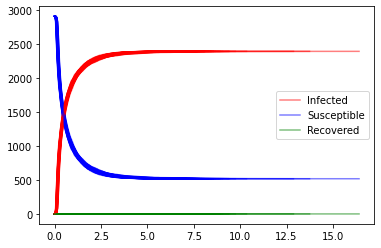

In [ ]:
Graph = nx.from_pandas_edgelist(df, source='Source', target='Target', create_using=G)
print('Number of nodes before removal', len(Graph.nodes()))

Graph.remove_nodes_from(nodes_b_15)
Node_list=list(Graph.nodes())
print('Number of nodes after removal', len(Node_list))
Ti_5,Dis_5,full_data_5= calculate_Ti(Graph)
print("Number of disconnected nodes", len(Dis_5))
T_b_5 = average(Ti_5)
print('Average value of Ti after removing nodes', T_b_5)

tmax = 20
iterations = 100  
tau = 1           #transmission rate
gamma = 0    #recovery rate

t, S, I, R = EoN.fast_SIR(Graph, tau, gamma,initial_infecteds = 'WUH', tmax = tmax) # first simulation
plt.plot(t,I,color = 'r',alpha=0.5, label='Infected')
plt.plot(t,S,color ='b',alpha =0.5, label='Susceptible')
plt.plot(t,R,color ='g',alpha =0.5, label='Recovered')
plt.legend()
for counter in range(iterations): # 99 more simulations
    t, S, I, R = EoN.fast_SIR(Graph, tau, gamma,initial_infecteds = 'WUH', tmax = tmax)
    plt.plot(t,I,color = 'r',alpha=0.5)
    plt.plot(t,S,color ='b',alpha =0.5)
    plt.plot(t,R,color ='g',alpha =0.5)

Number of nodes before removal 3425
Number of nodes after removal 2741
Number of disconnected nodes 833
Average value of Ti after removing nodes 2.3000533193658037


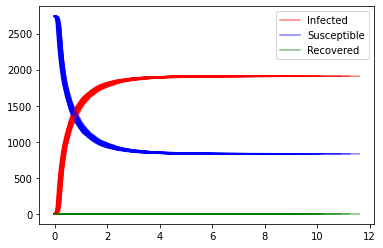

In [ ]:
Graph = nx.from_pandas_edgelist(df, source='Source', target='Target', create_using=G)
print('Number of nodes before removal', len(Graph.nodes()))

Graph.remove_nodes_from(nodes_b_20)
Node_list=list(Graph.nodes())
print('Number of nodes after removal', len(Node_list))
Ti_5,Dis_5,full_data_5= calculate_Ti(Graph)
print("Number of disconnected nodes", len(Dis_5))
T_b_5 = average(Ti_5)
print('Average value of Ti after removing nodes', T_b_5)

tmax = 20
iterations = 100  
tau = 1           #transmission rate
gamma = 0    #recovery rate

t, S, I, R = EoN.fast_SIR(Graph, tau, gamma,initial_infecteds = 'WUH', tmax = tmax) # first simulation
plt.plot(t,I,color = 'r',alpha=0.5, label='Infected')
plt.plot(t,S,color ='b',alpha =0.5, label='Susceptible')
plt.plot(t,R,color ='g',alpha =0.5, label='Recovered')
plt.legend()
for counter in range(iterations): # 99 more simulations
    t, S, I, R = EoN.fast_SIR(Graph, tau, gamma,initial_infecteds = 'WUH', tmax = tmax)
    plt.plot(t,I,color = 'r',alpha=0.5)
    plt.plot(t,S,color ='b',alpha =0.5)
    plt.plot(t,R,color ='g',alpha =0.5)

Number of nodes before removal 3425
Number of nodes after removal 2569
Number of disconnected nodes 1363
Average value of Ti after removing nodes 3.648602887183555


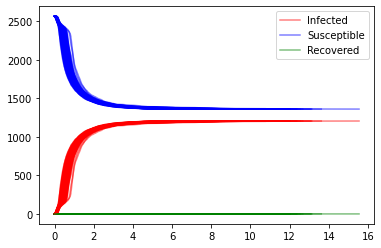

In [ ]:
Graph = nx.from_pandas_edgelist(df, source='Source', target='Target', create_using=G)
print('Number of nodes before removal', len(Graph.nodes()))

Graph.remove_nodes_from(nodes_b_25)
Node_list=list(Graph.nodes())
print('Number of nodes after removal', len(Node_list))
Ti_5,Dis_5,full_data_5= calculate_Ti(Graph)
print("Number of disconnected nodes", len(Dis_5))
T_b_5 = average(Ti_5)
print('Average value of Ti after removing nodes', T_b_5)

tmax = 20
iterations = 100  
tau = 1           #transmission rate
gamma = 0    #recovery rate

t, S, I, R = EoN.fast_SIR(Graph, tau, gamma,initial_infecteds = 'WUH', tmax = tmax) # first simulation
plt.plot(t,I,color = 'r',alpha=0.5, label='Infected')
plt.plot(t,S,color ='b',alpha =0.5, label='Susceptible')
plt.plot(t,R,color ='g',alpha =0.5, label='Recovered')
plt.legend()
for counter in range(iterations): # 99 more simulations
    t, S, I, R = EoN.fast_SIR(Graph, tau, gamma,initial_infecteds = 'WUH', tmax = tmax)
    plt.plot(t,I,color = 'r',alpha=0.5)
    plt.plot(t,S,color ='b',alpha =0.5)
    plt.plot(t,R,color ='g',alpha =0.5)

Number of nodes before removal 3425
Number of nodes after removal 2398
Number of disconnected nodes 2227
Average value of Ti after removing nodes 5.626577644805516


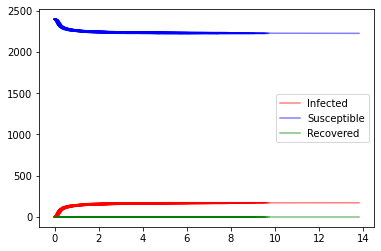

In [ ]:
Graph = nx.from_pandas_edgelist(df, source='Source', target='Target', create_using=G)
print('Number of nodes before removal', len(Graph.nodes()))

Graph.remove_nodes_from(nodes_b_30)
Node_list=list(Graph.nodes())
print('Number of nodes after removal', len(Node_list))
Ti_5,Dis_5,full_data_5= calculate_Ti(Graph)
print("Number of disconnected nodes", len(Dis_5))
T_b_5 = average(Ti_5)
print('Average value of Ti after removing nodes', T_b_5)

tmax = 20
iterations = 100  
tau = 1           #transmission rate
gamma = 0    #recovery rate

t, S, I, R = EoN.fast_SIR(Graph, tau, gamma,initial_infecteds = 'WUH', tmax = tmax) # first simulation
plt.plot(t,I,color = 'r',alpha=0.5, label='Infected')
plt.plot(t,S,color ='b',alpha =0.5, label='Susceptible')
plt.plot(t,R,color ='g',alpha =0.5, label='Recovered')
plt.legend()
for counter in range(iterations): # 99 more simulations
    t, S, I, R = EoN.fast_SIR(Graph, tau, gamma,initial_infecteds = 'WUH', tmax = tmax)
    plt.plot(t,I,color = 'r',alpha=0.5)
    plt.plot(t,S,color ='b',alpha =0.5)
    plt.plot(t,R,color ='g',alpha =0.5)